In [11]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


In [12]:
df = pd.read_csv("Analysis_of_Heartdisease.csv")
df.head()

,index,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium,HeartDisease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [13]:
df=df.drop(['index'], axis='columns')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   270 non-null    int64  
 1   Sex                   270 non-null    int64  
 2   Chest_pain_type       270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   Cholesterol           270 non-null    int64  
 5   FBS_over_120          270 non-null    int64  
 6   EKG_results           270 non-null    int64  
 7   Max_HR                270 non-null    int64  
 8   Exercise_angina       270 non-null    int64  
 9   ST_depression         270 non-null    float64
 10  Slope_of_ST           270 non-null    int64  
 11  Numberofvesselsfluro  270 non-null    int64  
 12  Thallium              270 non-null    int64  
 13  HeartDisease          270 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 29.7+ KB


In [15]:
df.isnull().sum()

Age                     0
Sex                     0
Chest_pain_type         0
BP                      0
Cholesterol             0
FBS_over_120            0
EKG_results             0
Max_HR                  0
Exercise_angina         0
ST_depression           0
Slope_of_ST             0
Numberofvesselsfluro    0
Thallium                0
HeartDisease            0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df
df1.HeartDisease = le.fit_transform(df1.HeartDisease)
df1.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium,HeartDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   270 non-null    int64  
 1   Sex                   270 non-null    int64  
 2   Chest_pain_type       270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   Cholesterol           270 non-null    int64  
 5   FBS_over_120          270 non-null    int64  
 6   EKG_results           270 non-null    int64  
 7   Max_HR                270 non-null    int64  
 8   Exercise_angina       270 non-null    int64  
 9   ST_depression         270 non-null    float64
 10  Slope_of_ST           270 non-null    int64  
 11  Numberofvesselsfluro  270 non-null    int64  
 12  Thallium              270 non-null    int64  
 13  HeartDisease          270 non-null    int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 28.6 KB


In [18]:
df.describe()


,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium,HeartDisease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [19]:
df1.nunique()


Age                      41
Sex                       2
Chest_pain_type           4
BP                       47
Cholesterol             144
FBS_over_120              2
EKG_results               3
Max_HR                   90
Exercise_angina           2
ST_depression            39
Slope_of_ST               3
Numberofvesselsfluro      4
Thallium                  3
HeartDisease              2
dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

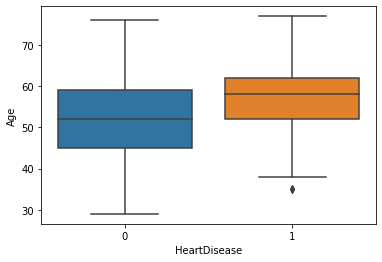

In [20]:
sns.boxplot(data=df1, y="Age",x="HeartDisease")


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

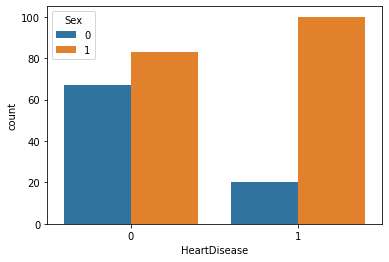

In [21]:
sns.countplot(x="HeartDisease", data=df1, hue="Sex")


In [22]:
df1["Sex"].value_counts()


1    183
0     87
Name: Sex, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop("HeartDisease", axis =1))
df1_scaled = scaler.transform(df1.drop("HeartDisease", axis = 1))
df1_scaled = pd.DataFrame(df1_scaled, columns = df1.columns[:-1])
df1_scaled.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Numberofvesselsfluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


Text(0.5, 1.0, 'Correlation between variables')

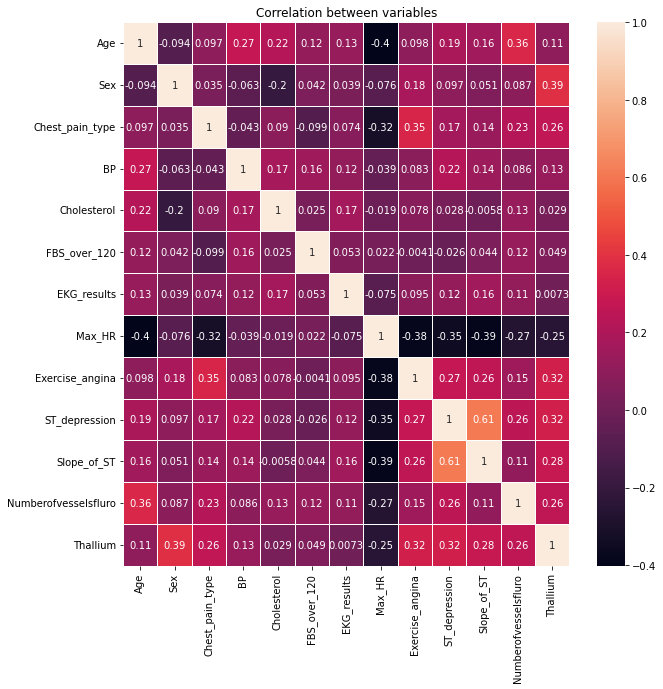

In [24]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df1_scaled.corr(),annot= True, linewidth=0.5)
plt.title("Correlation between variables")


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X = df1_scaled
y = df1["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


<AxesSubplot:>

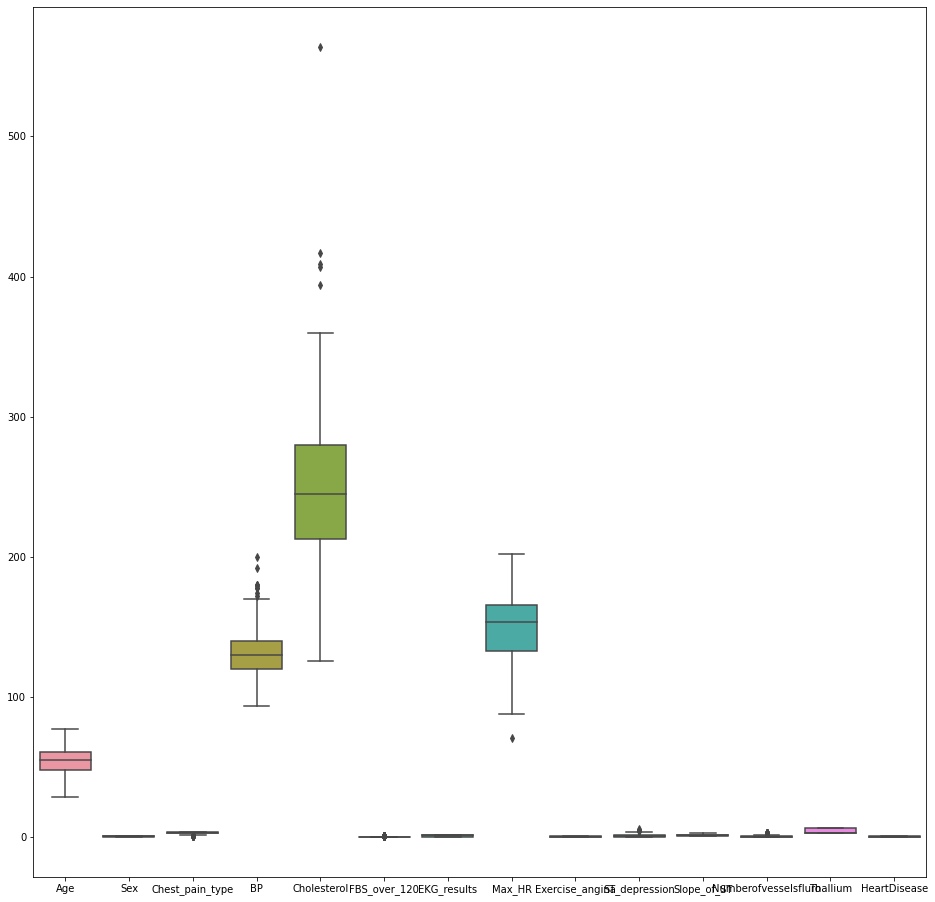

In [27]:
plt.figure(figsize=(16,16))
sns.boxplot (data= df1)

In [28]:
from scipy import stats
import numpy as np
 
# Remove outliers for trestbps column
z = np.abs(stats.zscore(heart_data['BP']))
print(z)
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))
(array([223, 248]),)
# IQR
Q1 = np.percentile(heart_data['BP'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(heart_data['BP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", heart_data.shape)
 
# Upper bound
upper = np.where(heart_data['BP'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(heart_data['BP'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
heart_data.drop(upper[0], inplace = True)
heart_data.drop(lower[0], inplace = True)
 
print("New Shape: ", heart_data.shape)

NameError: name 'heart_data' is not defined

In [ ]:

# Remove outliers for chol column
q1 = heart_data['chol'].quantile(0.25)
q3 = heart_data['chol'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(heart_data['chol'])
for i in heart_data['chol']:
    if i > Upper_tail or i < Lower_tail:
            heart_data['chol'] = heart_data['chol'].replace(i, med)
plt.figure(figsize=(16,16))
sns.boxplot (data= heart_data)
# Remove outliers for thalach column
q1 = heart_data['thalach'].quantile(0.25)
q3 = heart_data['thalach'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(heart_data['thalach'])
for i in heart_data['thalach']:
    if i > Upper_tail or i < Lower_tail:
            heart_data['thalach'] = heart_data['thalach'].replace(i, med)

# Remove outliers for oldpeak column
q1 = heart_data['oldpeak'].quantile(0.25)
q3 = heart_data['oldpeak'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(heart_data['oldpeak'])
for i in heart_data['oldpeak']:
    if i > Upper_tail or i < Lower_tail:
            heart_data['oldpeak'] = heart_data['oldpeak'].replace(i, med)
            
# Remove outliers for fbs column
q1 = heart_data['fbs'].quantile(0.25)
q3 = heart_data['fbs'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(heart_data['fbs'])
for i in heart_data['fbs']:
    if i > Upper_tail or i < Lower_tail:
            heart_data['fbs'] = heart_data['fbs'].replace(i, med)
# Remove outliers for ca column
q1 = heart_data['ca'].quantile(0.25)
q3 = heart_data['ca'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(heart_data['ca'])
for i in heart_data['ca']:
    if i > Upper_tail or i < Lower_tail:
            heart_data['ca'] = heart_data['ca'].replace(i, med)
# Remove outliers for thal column
q1 = heart_data['thal'].quantile(0.25)
q3 = heart_data['thal'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(heart_data['thal'])
for i in heart_data['thal']:
    if i > Upper_tail or i < Lower_tail:
            heart_data['thal'] = heart_data['thal'].replace(i, med)
# Remove outliers for cp column
q1 = heart_data['cp'].quantile(0.25)
q3 = heart_data['cp'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(heart_data['cp'])
for i in heart_data['cp']:
    if i > Upper_tail or i < Lower_tail:
            heart_data['cp'] = heart_data['cp'].replace(i, med)
plt.figure(figsize=(16,16))
sns.boxplot (data= heart_data)
plt.title("Box Plot after outlier removal")



In [ ]:
#Preprocessing using min max scaler
scaler = MinMaxScaler()

scaler.fit(df1.drop("HeartDisease", axis =1))
df2_scaled = scaler.transform(df1.drop("HeartDisease", axis =1))
df2_scaled = pd.DataFrame(df2_scaled, columns = df1.columns[:-1])

df2_scaled.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = heart[['Age','Sex','Chest_pain_type','BP','Cholesterol','FBS_over_120','EKG_results','Max_HR','Exercise_angina','ST_depression','Slope_of_ST','Numberofvesselsfluro','Thallium']]
y = heart["HeartDisease"]
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
print ("Logistic testing accuracy is ", round(accuracy,2) * 100, "%")

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
GaussianNB()
nb_model.score(X_test, y_test)
predictions = nb_model.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.sum(y_test - pred))
sns.lineplot(x = range(1, 40), y = error, marker = "o", color = "blue", markerfacecolor= "red")
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))